In [38]:
import numpy as np 
import pandas as pd 
import math 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [39]:
data = pd.read_csv("problem2.csv",header=None, index_col=0, names=np.arange(0, 12))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
x_age,35,18,22,23,28,38,40,25,35,34,25,20
x_cholesterol,220,240,260,220,180,280,235,200,150,280,275,150
x_sugar,80,120,55,75,100,74,175,180,240,130,150,125
x_Tcell,550,600,580,575,620,674,275,180,140,80,250,325
y,0,0,0,0,0,0,1,1,1,1,1,1


In [40]:
data = data.T
data

,x_age,x_cholesterol,x_sugar,x_Tcell,y
0,35,220,80,550,0
1,18,240,120,600,0
2,22,260,55,580,0
3,23,220,75,575,0
4,28,180,100,620,0
5,38,280,74,674,0
6,40,235,175,275,1
7,25,200,180,180,1
8,35,150,240,140,1
9,34,280,130,80,1


In [41]:
x = data[['x_age', 'x_cholesterol', 'x_sugar', 'x_Tcell']]
x

,x_age,x_cholesterol,x_sugar,x_Tcell
0,35,220,80,550
1,18,240,120,600
2,22,260,55,580
3,23,220,75,575
4,28,180,100,620
5,38,280,74,674
6,40,235,175,275
7,25,200,180,180
8,35,150,240,140
9,34,280,130,80


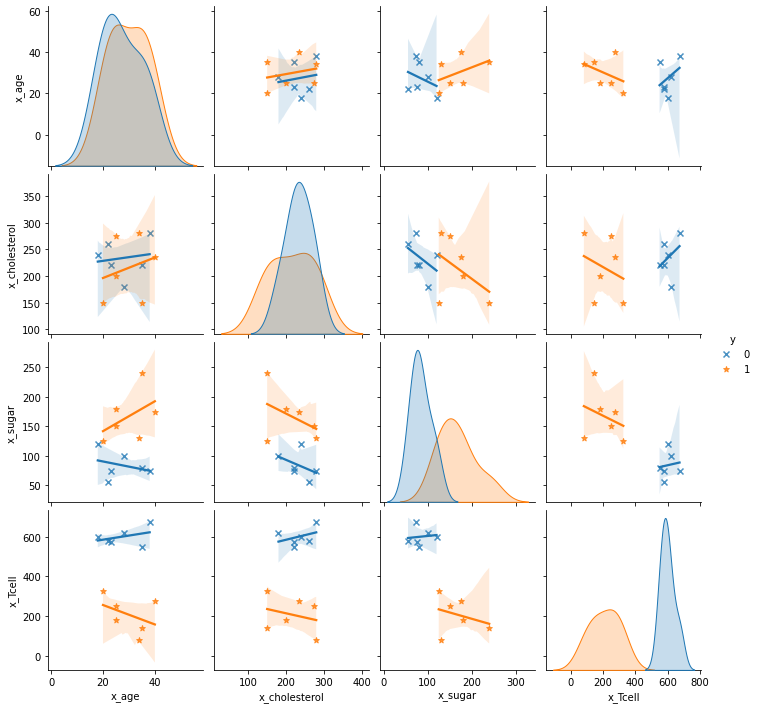

In [43]:
sns.pairplot(data, hue="y", diag_kind='kde', kind='reg', markers=['x', '*'])
plt.show()

In [44]:

model1 = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
model1.fit(np.array(data["x_sugar"]).reshape(-1, 1), np.array(data["y"]))
model1.score(np.array(data["x_sugar"]).reshape(-1, 1), np.array(data["y"]))

1.0

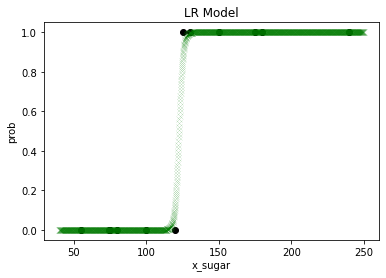

In [50]:
X_sugar = np.arange(40, 250, 0.1).reshape(-1, 1)
plt.scatter(data["x_sugar"], data["y"], color="black")
plt.scatter(X_sugar, model1.predict_proba(X_sugar)[:, 1], marker='x', color='g', linewidths=.1, alpha=1)
plt.title("LR Model")
plt.xlabel("x_sugar")
plt.ylabel("prob")
plt.show()


In [46]:
model2 = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
model2.fit(np.array(data["x_Tcell"]).reshape(-1, 1), np.array(data["y"]))
model2.score(np.array(data["x_Tcell"]).reshape(-1, 1), np.array(data["y"]))

1.0

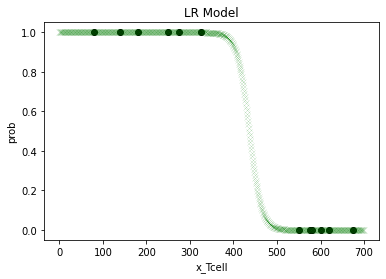

In [52]:
X_Tcell = np.arange(0, 700, 1).reshape(-1, 1)
plt.scatter(data["x_Tcell"], data["y"], color="black")
plt.scatter(X_Tcell, model2.predict_proba(X_Tcell)[:, 1], marker='x', color='g', linewidths=.1)
plt.title("LR Model")
plt.xlabel("x_Tcell")
plt.ylabel("prob")
plt.show()